#  MNIST with Keras library

Accuracy Achieved: 99.30

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'svg'

Using TensorFlow backend.


In [3]:
# split the training and testing data into X (image) and Y (label) arrays

train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

In [6]:
# reshape the data

im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

In [7]:
# our 3 models 

name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

In [8]:
# the model summaries

for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

In [9]:
# train the models and save results to a dict

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Train on 47999 samples, validate on 12000 samples
Epoch 1/50
47999/47999 [==============================] - 28s 591us/step - loss: 0.6198 - acc: 0.8347 - val_loss: 0.2645 - val_acc: 0.9253
Epoch 2/50
47999/47999 [==============================] - 30s 626us/step - loss: 0.2333 - acc: 0.9324 - val_loss: 0.1797 - val_acc: 0.9489
Epoch 3/50
47999/47999 [==============================] - 28s 577us/step - loss: 0.1655 - acc: 0.9515 - val_loss: 0.1364 - val_acc: 0.9611
Epoch 4/50
47999/47999 [==============================] - 30s 628us/step - loss: 0.1285 - acc: 0.9632 - val_loss: 0.1203 - val_acc: 0.9657
Epoch 5/50
47999/47999 [==============================] - 28s 581us/step - loss: 0.1073 - acc: 0.9682 - val_loss: 0.0977 - val_acc: 0.9733
Epoch 6/50
47999/47999 [==============================] - 27s 561us/step - loss: 0.0906 - acc: 0.9739 - val_loss: 0.0882 - val_acc: 0.9736
Epoch 7/50
47999/47999 [==============================] - 29s 607us/step - loss: 0.0794 - acc: 0.9772 - val_loss: 0.

47999/47999 [==============================] - 63s 1ms/step - loss: 0.0284 - acc: 0.9916 - val_loss: 0.0444 - val_acc: 0.9868
Epoch 10/50
47999/47999 [==============================] - 62s 1ms/step - loss: 0.0258 - acc: 0.9917 - val_loss: 0.0394 - val_acc: 0.9896
Epoch 11/50
47999/47999 [==============================] - 61s 1ms/step - loss: 0.0236 - acc: 0.9922 - val_loss: 0.0390 - val_acc: 0.9894
Epoch 12/50
47999/47999 [==============================] - 60s 1ms/step - loss: 0.0199 - acc: 0.9937 - val_loss: 0.0368 - val_acc: 0.9897
Epoch 13/50
47999/47999 [==============================] - 59s 1ms/step - loss: 0.0177 - acc: 0.9945 - val_loss: 0.0388 - val_acc: 0.9890
Epoch 14/50
47999/47999 [==============================] - 58s 1ms/step - loss: 0.0177 - acc: 0.9943 - val_loss: 0.0392 - val_acc: 0.9888
Epoch 15/50
47999/47999 [==============================] - 58s 1ms/step - loss: 0.0167 - acc: 0.9945 - val_loss: 0.0393 - val_acc: 0.9892
Epoch 16/50
47999/47999 [=====================

47999/47999 [==============================] - 132s 3ms/step - loss: 0.0195 - acc: 0.9937 - val_loss: 0.0307 - val_acc: 0.9924
Epoch 19/50
47999/47999 [==============================] - 132s 3ms/step - loss: 0.0219 - acc: 0.9930 - val_loss: 0.0295 - val_acc: 0.9923
Epoch 20/50
47999/47999 [==============================] - 225s 5ms/step - loss: 0.0179 - acc: 0.9944 - val_loss: 0.0328 - val_acc: 0.9928
Epoch 21/50
47999/47999 [==============================] - 136s 3ms/step - loss: 0.0177 - acc: 0.9941 - val_loss: 0.0310 - val_acc: 0.9925
Epoch 22/50
47999/47999 [==============================] - 133s 3ms/step - loss: 0.0176 - acc: 0.9939 - val_loss: 0.0312 - val_acc: 0.9927
Epoch 23/50
47999/47999 [==============================] - 136s 3ms/step - loss: 0.0185 - acc: 0.9938 - val_loss: 0.0312 - val_acc: 0.9924
Epoch 24/50
47999/47999 [==============================] - 134s 3ms/step - loss: 0.0147 - acc: 0.9951 - val_loss: 0.0373 - val_acc: 0.9913
Epoch 25/50
47999/47999 [==============

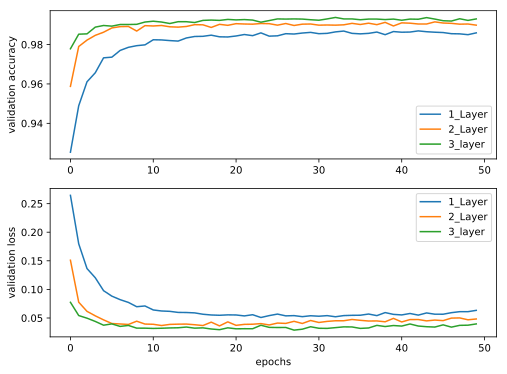

In [10]:
# plot the accuracy and loss

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [ ]:
Y_pred = model.predict(x_test)

In [ ]:
submission = pd.DataFrame({
        "ImageId": test_df["ImageId"],
        "Label": Y_pred
    })
submission.to_csv('/Users/ganesh/Jupyter/JupyterNB/prediction.csv', index=False)